In [1]:
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt

# Ensure src is in the import path
project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Import damage classes
from damage_effects import (TearDamage, ScratchDamage, 
                            WaterDiscolouration)

# Load the sample image

In [2]:
# Load the base image
input_path = os.path.join(project_root,
                          "data", 
                          "sample-image-canvas-oil-Le-Moulin-de-la-Galette-1876.png")
original_image = Image.open(input_path).convert("RGB")

# Apply the damages

In [3]:
# Define damage versions
damage_versions = [
    [],  # Original
    [TearDamage()],
    [ScratchDamage()],
    [WaterDiscolouration()],
    [TearDamage(), ScratchDamage(), WaterDiscolouration()]
]

# Generate images
images = []
for pipeline in damage_versions:
    img = original_image.copy()
    for dmg in pipeline:
        img = dmg.apply(img)
    images.append(img)

# Visualze the damages

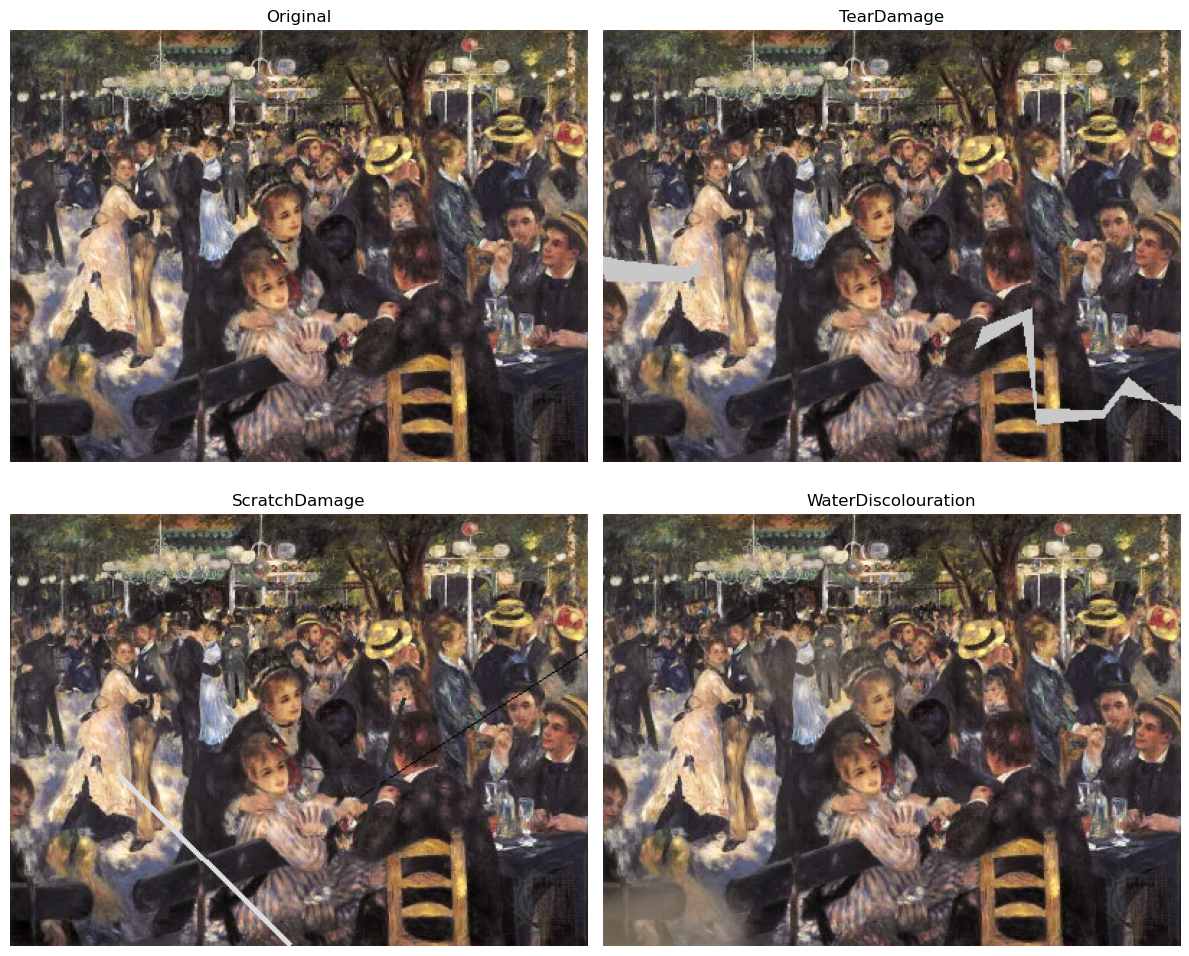

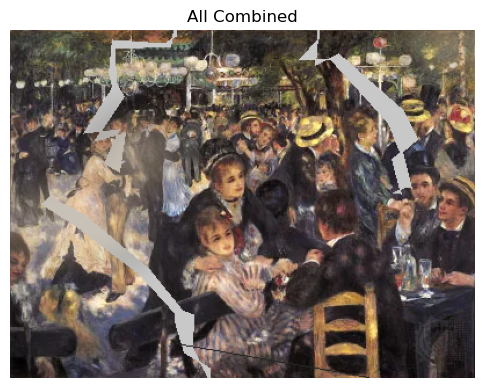

In [4]:
titles = [
    "Original",
    "TearDamage",
    "ScratchDamage",
    "WaterDiscolouration",
    "All Combined"
]

# Plot as 2x2 grid (first 4) + one below
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(titles[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

# Show "All Combined" separately
plt.figure(figsize=(6, 6))
plt.imshow(images[4])
plt.title(titles[4])
plt.axis("off")
plt.show()